# Carla Challita 

## Chapter 8

### Exercise 3 

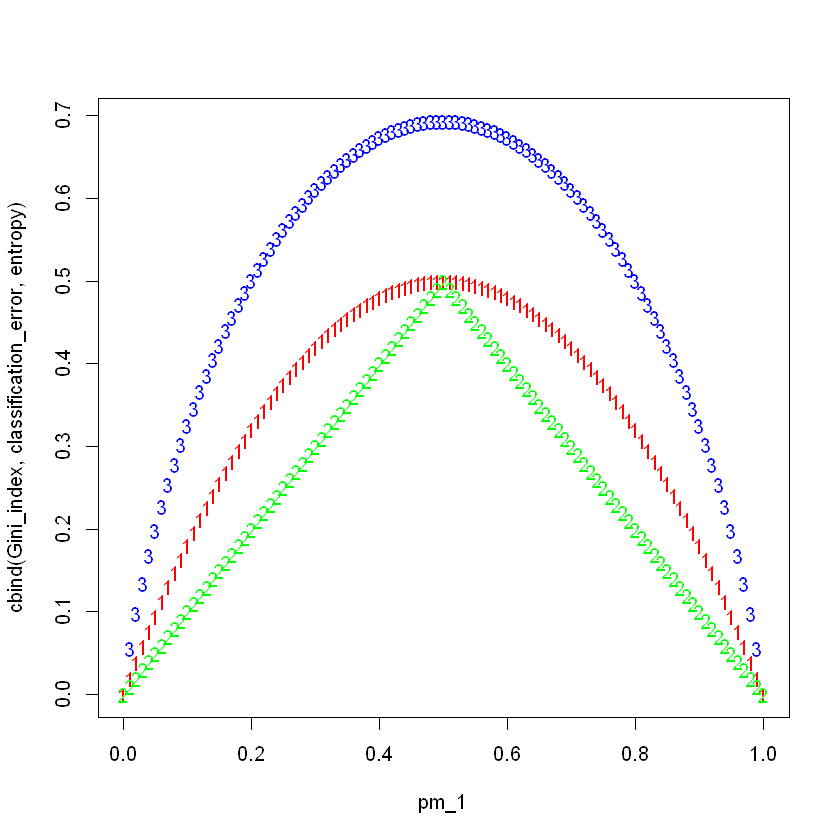

In [49]:
p <- seq(0, 1, 0.01)
Gini_index <- 2 * p * (1 - p)
classification_error <- 1 - pmax(p, 1 - p)
entropy <- -(p * log(p) + (1 - p) * log(1 - p))
matplot(pm_1, cbind(Gini_index, classification_error, entropy), col = c("red", "green", "blue"))

### Exercise 5

In [50]:
#Majority vote approach: X is classified as Red since it occurs more times than Green in the 10 predictions. 
#Average probability approach: X is classified as Green since the average of the 10 probabilities of Red is 0.45.

### Exercise 8

In [51]:
library(ISLR)
data(Carseats)
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [52]:
#Part a
set.seed(123)
data_split <- sample(1:nrow(Carseats), nrow(Carseats)/2)
train <- Carseats[data_split,]
test <- Carseats[-data_split,]

In [53]:
#Part b
install.packages("tree")
library(tree)
tree_Carseats <- tree(Sales ~ ., data = train)
summary(tree_Carseats)


  There is a binary version available but the source version is later:
     binary source needs_compilation
tree 1.0-40 1.0-41              TRUE

  Binaries will be installed


Warning message:
"package 'tree' is in use and will not be installed"


Regression tree:
tree(formula = Sales ~ ., data = train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "Age"         "Population" 
[6] "Education"   "CompPrice"   "Advertising"
Number of terminal nodes:  18 
Residual mean deviance:  2.132 = 388.1 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.08000 -0.92870  0.06244  0.00000  0.87020  3.71700 

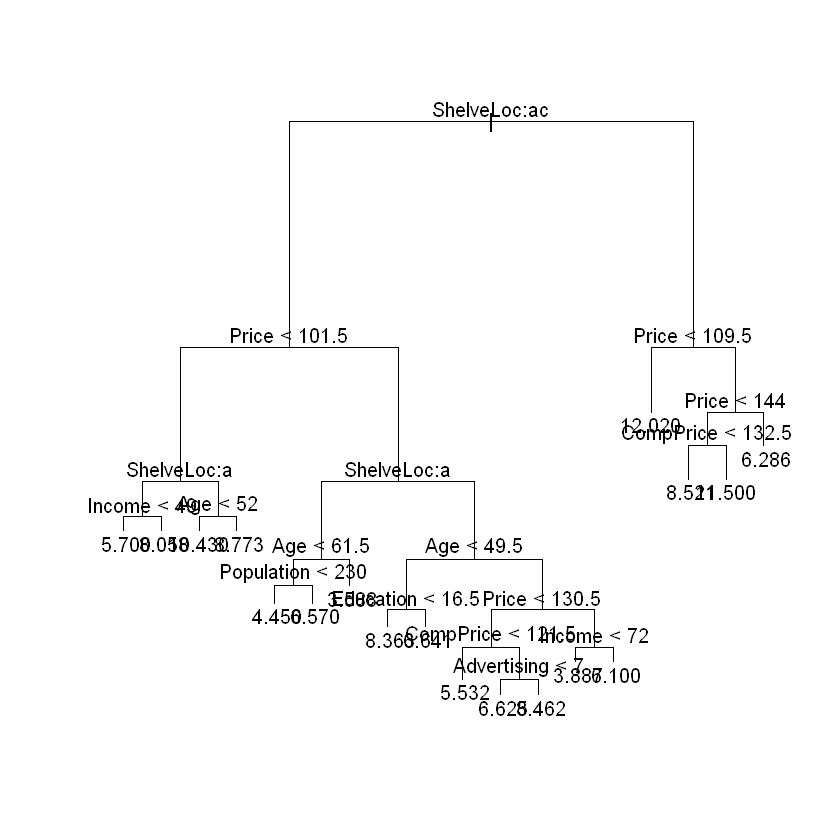

In [54]:
plot(tree_Carseats)
text(tree_Carseats)

In [55]:
tree_pred <- predict(tree_Carseats, newdata=test)
tree_err <- mean((test$Sales - tree_pred)^2)
tree_err
#The test MSE is 4.39.

[1] 4.395357

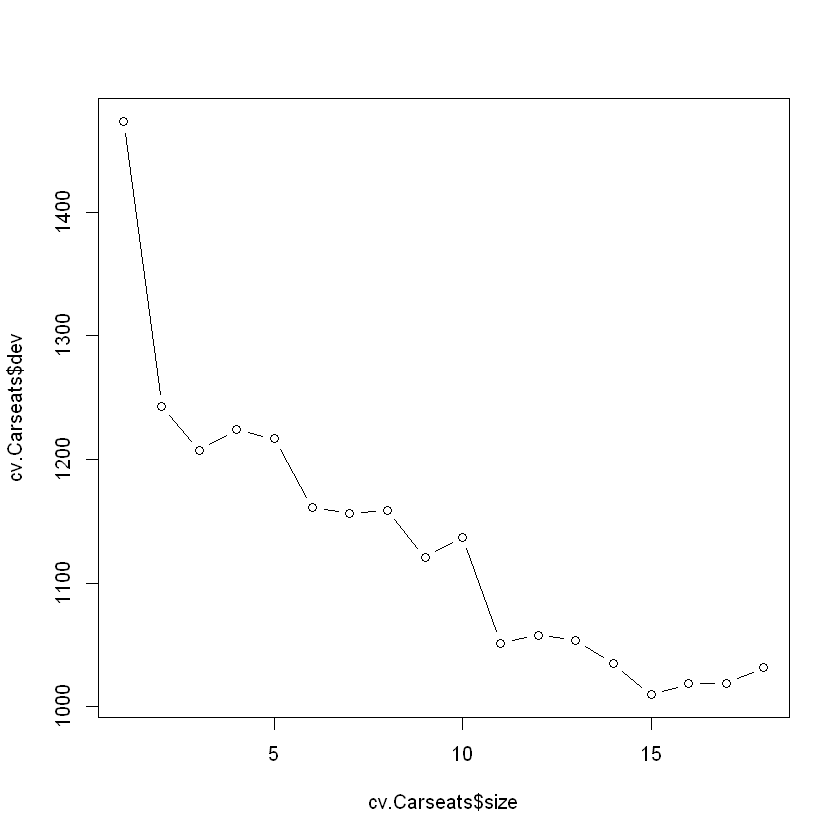

In [56]:
#Part c
cv.Carseats <- cv.tree(tree_Carseats)
plot(cv.Carseats$size, cv.Carseats$dev, type = "b")

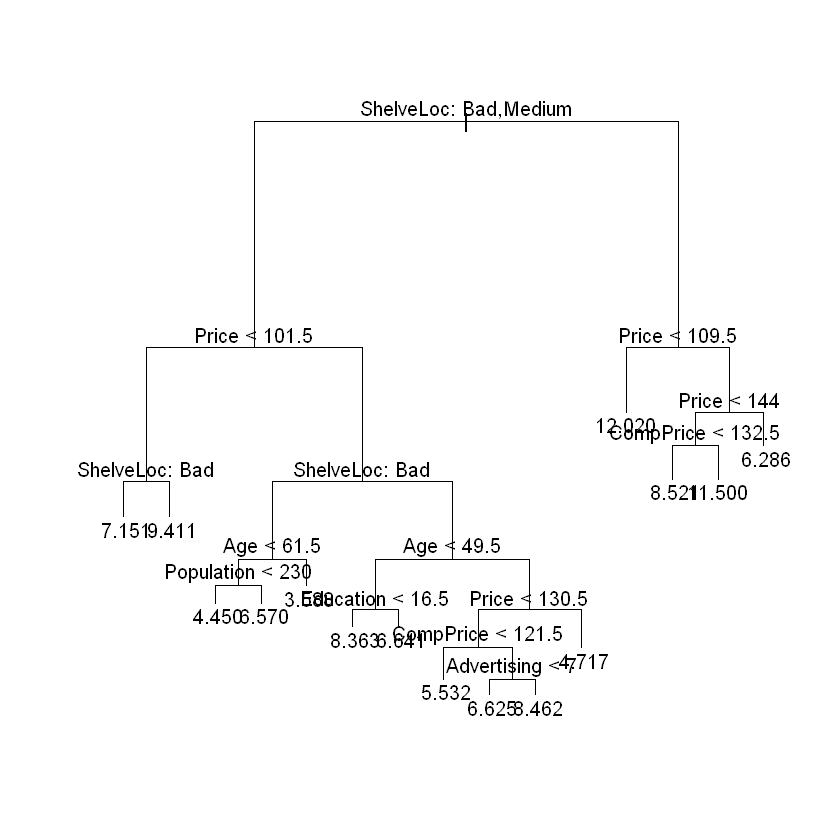

In [57]:
#The tree of size 15 is selected according to the above cross validation
prune_Carseats <- prune.tree(tree_Carseats, best = 15)
plot(prune_Carseats)
text(prune_Carseats, pretty = 0)

In [58]:
tree_pred <- predict(prune_Carseats, newdata = test)
tree_err <- mean((test$Sales - tree_pred)^2)
tree_err
#The test MSE is 4.59.

[1] 4.591618

In [59]:
#Part d
library (randomForest)
set.seed(123)
bag_Carseats <- randomForest(Sales ~ ., data = train, mtry = 10, importance = TRUE)
bag_pred <- predict(bag_Carseats, newdata = test)
bag_err <- mean((test$Sales - bag_pred)^2)
bag_err
#The test MSE decreasd to 2.76. 

[1] 2.76144

In [60]:
importance(bag_Carseats)
#According to the below results, the variables Price and ShelveLoc are most important.

,%IncMSE,IncNodePurity
CompPrice,20.3414969,158.911610
Income,6.6237140,90.369331
Advertising,5.7777253,72.793558
Population,-2.2001506,55.786278
Price,44.3578602,380.255094
ShelveLoc,48.3345635,387.886972
Age,18.6296851,187.107660
Education,2.6619834,55.987493
Urban,0.9276070,8.152320
US,0.4202302,5.900097


In [61]:
#Part e 
set.seed(123)
rf_Carseats <- randomForest(Sales ~ ., data = train, mtry = 3, importance = TRUE)
rf_pred <- predict(rf_Carseats, newdata = test)
rf_err <- mean((test$Sales - rf_pred)^2)
rf_err
#The test MSE increases to 3.53. 

[1] 3.533125

In [62]:
importance(rf_Carseats)
#According to the below results, the variables Price and ShelveLoc are also the most important.

,%IncMSE,IncNodePurity
CompPrice,11.95200717,145.12635
Income,5.20336607,118.16230
Advertising,7.04990655,98.65437
Population,2.81702037,103.08744
Price,31.00971810,296.40130
ShelveLoc,31.20191070,275.21715
Age,16.38791734,207.57234
Education,0.70334051,74.24887
Urban,0.04221302,16.05767
US,1.67637748,13.58655


### Exercise 9

In [64]:
head(OJ)

Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


In [83]:
#Part a
set.seed(123)
data_split <- sample(1:nrow(OJ), 800)
train <- OJ[data_split, ]
test <- OJ[-data_split, ]

In [84]:
#Part b
tree_OJ <- tree(Purchase ~ ., data = train)
summary(tree_OJ)
#According to the below results, the training error rate is 0.165 and there are 8 terminal nodes.


Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7625 = 603.9 / 792 
Misclassification error rate: 0.165 = 132 / 800 

In [85]:
#Part c
tree_OJ

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1071.00 CH ( 0.60875 0.39125 )  
   2) LoyalCH < 0.5036 350  415.10 MM ( 0.28000 0.72000 )  
     4) LoyalCH < 0.276142 170  131.00 MM ( 0.12941 0.87059 )  
       8) LoyalCH < 0.0356415 56   10.03 MM ( 0.01786 0.98214 ) *
       9) LoyalCH > 0.0356415 114  108.90 MM ( 0.18421 0.81579 ) *
     5) LoyalCH > 0.276142 180  245.20 MM ( 0.42222 0.57778 )  
      10) PriceDiff < 0.05 74   74.61 MM ( 0.20270 0.79730 ) *
      11) PriceDiff > 0.05 106  144.50 CH ( 0.57547 0.42453 ) *
   3) LoyalCH > 0.5036 450  357.10 CH ( 0.86444 0.13556 )  
     6) PriceDiff < -0.39 27   32.82 MM ( 0.29630 0.70370 ) *
     7) PriceDiff > -0.39 423  273.70 CH ( 0.90071 0.09929 )  
      14) LoyalCH < 0.705326 130  135.50 CH ( 0.78462 0.21538 )  
        28) PriceDiff < 0.145 43   58.47 CH ( 0.58140 0.41860 ) *
        29) PriceDiff > 0.145 87   62.07 CH ( 0.88506 0.11494 ) *
      15) LoyalCH > 0.705326 293  112.50 CH ( 0.952

In [86]:
#Node label 10 is a terminal node because of the asterisk.
#The split criterion is LoyalCH < 0.05.
#The number of observations in that branch is 74 with a deviance of 74.61 and an overall prediction for the branch of MM. 
#2% of the observations in that branch take the value of CH, and 98% take the value of MM.

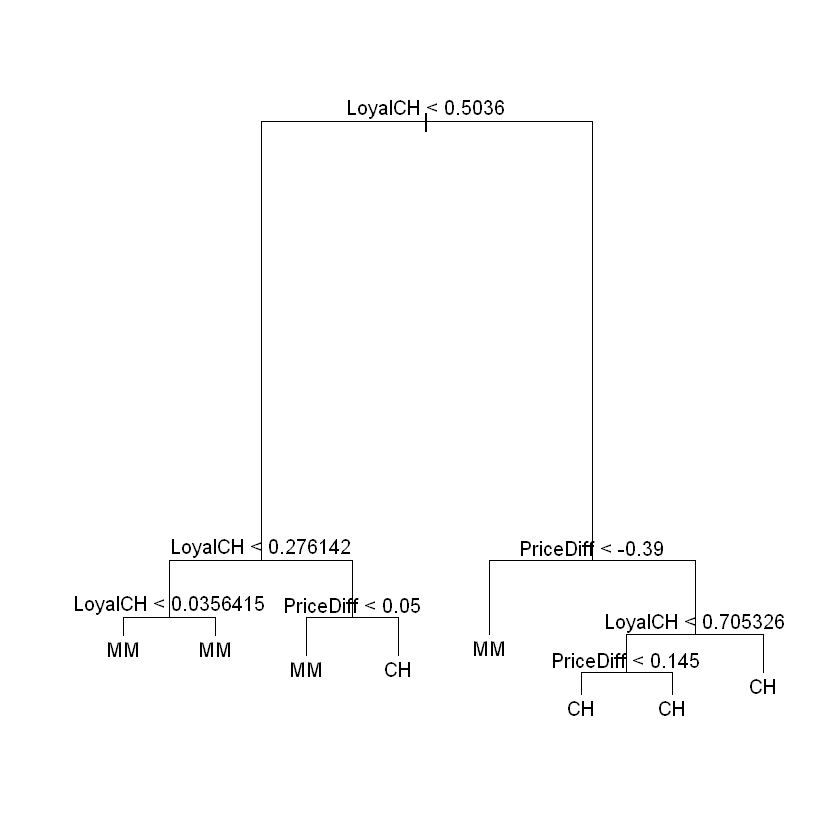

In [70]:
#Part d 
plot(tree_OJ)
text(tree_OJ, pretty = 0)

In [72]:
#Part e
tree_pred <- predict(tree_OJ, test, type = "class")
table(tree_pred, test$Purchase)

         
tree_pred  CH  MM
       CH 150  34
       MM  16  70

In [87]:
1 - (150 + 70) / 270
#According to the below, the test error rate is around 18.51%.

[1] 0.1851852

In [88]:
#Part f
cv_OJ <- cv.tree(tree_OJ, FUN = prune.misclass)
cv_OJ

$size
[1] 8 5 3 2 1

$dev
[1] 141 138 161 165 313

$k
[1] -Inf    0    8   11  154

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

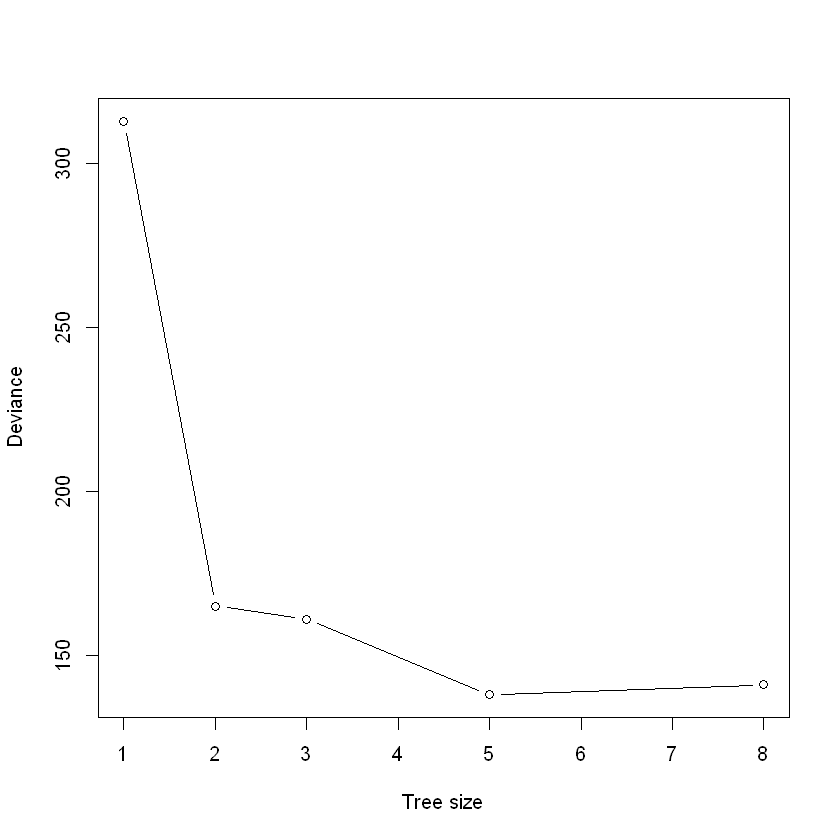

In [89]:
#Part g 
plot(cv_OJ$size, cv_OJ$dev, type = "b", xlab = "Tree size", ylab = "Deviance")

In [90]:
#Part h
#The 5-node tree corresponds to the lowest cross-validated classification error rate.

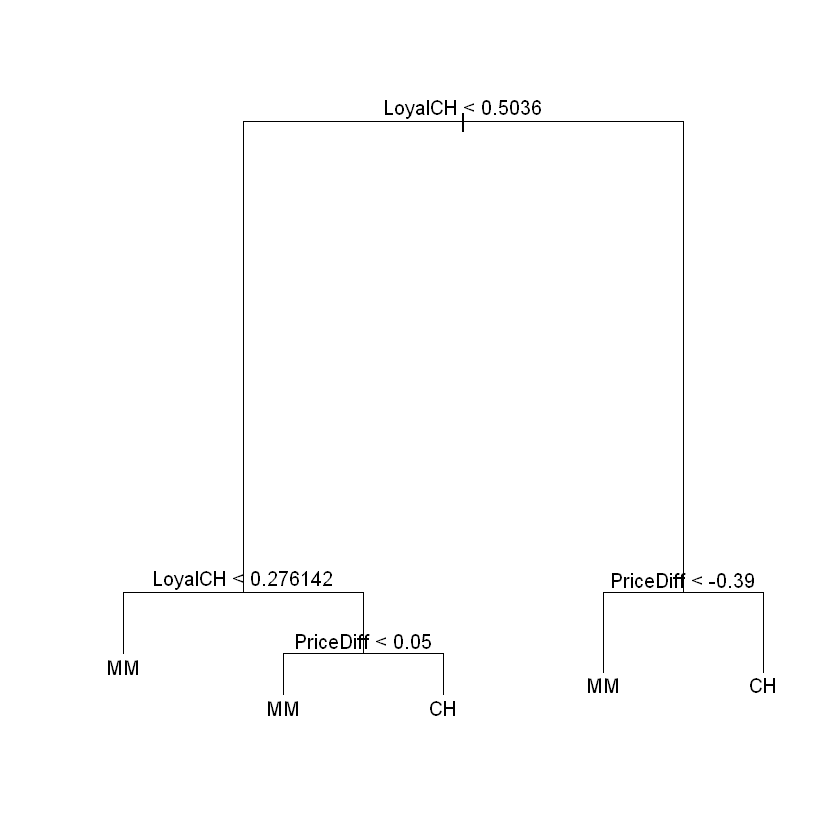

In [91]:
#Part i
prune_OJ <- prune.misclass(tree_OJ, best = 5)
plot(prune_OJ)
text(prune_OJ, pretty = 0)

In [92]:
#Part j
summary(tree_OJ)


Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7625 = 603.9 / 792 
Misclassification error rate: 0.165 = 132 / 800 

In [93]:
summary(prune_OJ)


Classification tree:
snip.tree(tree = tree_OJ, nodes = c(4L, 7L))
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  5 
Residual mean deviance:  0.826 = 656.6 / 795 
Misclassification error rate: 0.165 = 132 / 800 

In [94]:
#According to the above results, the error rate is the same for the pruned and un-pruned trees.

In [95]:
#Part k
prune_pred <- predict(prune_OJ, test, type = "class")
table(prune_pred, test$Purchase)

          
prune_pred  CH  MM
        CH 150  34
        MM  16  70

In [97]:
1 - (150 + 70) / 270
#According to the below, the test error rate is also around 18.51%.

[1] 0.1851852

### Exercise 10

In [99]:
head(Hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [111]:
#Part a
Hitters <- na.omit(Hitters)
Hitters$Salary <- log(Hitters$Salary)

In [117]:
#Part b
set.seed(123)
data_split <- sample(1:nrow(Hitters), 200)
train <- Hitters[data_split, ]
test <- Hitters[-data_split, ]

In [124]:
#Part c

In [125]:
#Part d

In [120]:
#Part e
library(glmnet)

In [121]:
fit_1 <- lm(Salary ~ ., data = train)
pred_1 <- predict(fit_1, test)
mean((test$Salary - pred_1)^2)

[1] 0.01400177

In [122]:
x <- model.matrix(Salary ~ ., data = train)
x_test <- model.matrix(Salary ~ ., data = test)
y <- train$Salary
fit_2 <- glmnet(x, y, alpha = 0)
pred_2 <- predict(fit_2, s = 0.01, newx = x_test)
mean((test$Salary - pred_2)^2)

[1] 0.01396806

In [126]:
#Part f

In [ ]:
#Part g